<a href="https://colab.research.google.com/github/ajinkyagaikwad/Data-Cleaning-Project/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
url = 'https://en.wikipedia.org/wiki/Machine_learning'

In [12]:
import requests
text= requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Machine learning - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-

In [13]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History 2 Relationships to other fields Toggle Relationships to other fields subsection 2.1 Artificial intelligence 2.2 Data compression 2.3 Data mining 2.4 Generalization 2.5 Statistics 2.6 Statistical physics 3 Theory 4 Approaches Toggle Approaches subsection 4.1 Supervised learning 4.2 Unsupervised learning 4.3 Semi-supervised learning 4.4 Reinforcement learning 4.5 Dimensionality reduction 4.6 Other types 4.6.1 Self-learning 4.6.2 Feature learning 4.6.3 Sparse dictionary learning 4.6.4 Anomaly detection 4.6.5 Robot learning 4.6.6 Ass

In [8]:
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=403bb80ddd96b6ceb814175815a085ffe44ec8699c7639834b6795484315d346
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [29]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=5,min_chars=8)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('neural networks', 4.0),
 ('pattern recognition', 4.0),
 ('main article', 4.0),
 ('mit press', 4.0),
 ('wayback machine', 4.0),
 ('artificial neurons', 3.9696969696969697),
 ('artificial neuron', 3.9696969696969697),
 ('retrieved 2018-08-20', 3.9649122807017543),
 ('machine learning', 3.950310559006211),
 ('statistical learning', 3.950310559006211),
 ('feature learning', 3.950310559006211),
 ('reinforcement learning', 3.950310559006211),
 ('artificial intelligence', 3.8896969696969697),
 ('supervised learning', 3.8733874820831344),
 ('computer vision', 3.833333333333333),
 ('unsupervised learning', 3.7964644051600573),
 ('retrieved 2022-01-17', 3.742690058479532),
 ('training data', 3.65625),
 ('knowledge discovery', 3.5238095238095237),
 ('learning', 1.950310559006211),
 ('research', 1.6666666666666667),
 ('training', 1.65625),
 ('algorithms', 1.6296296296296295),
 ('algorithm', 1.6111111111111112),
 ('examples', 1.5263157894736843),
 ('classification', 1.5),


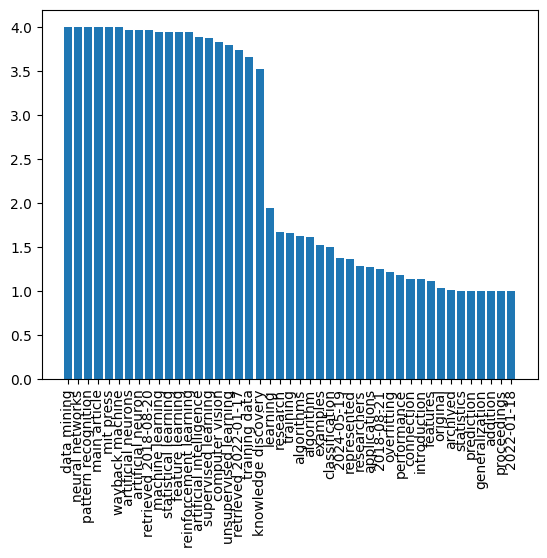

<Figure size 2500x1200 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.figure(figsize=(25,12))
    plt.show()

plot(res)

In [35]:
!{sys.executable} -m pip install wordcloud

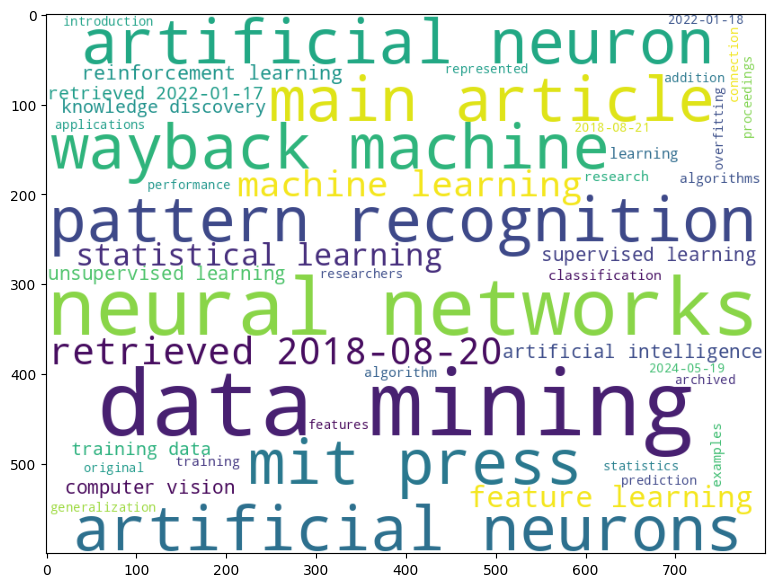

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

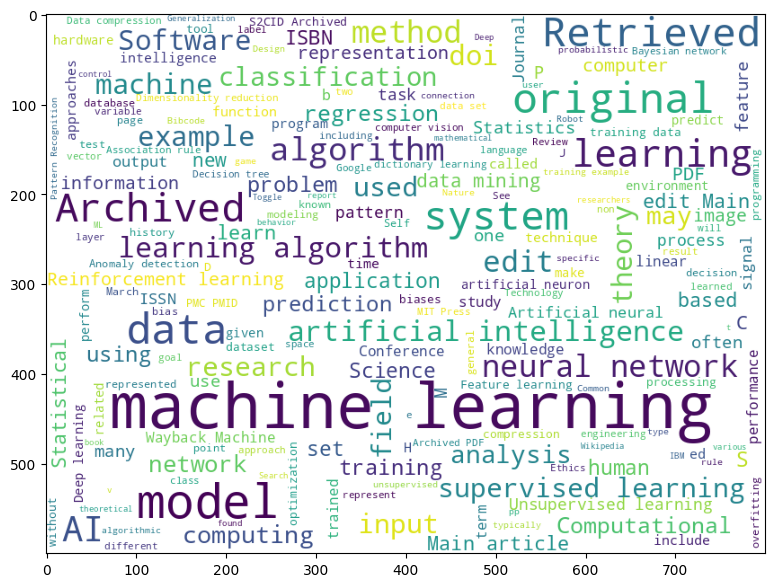

In [37]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [39]:
wc.generate(text).to_file('/ds_wordcloud.png')